#### NMF on Movie Recommender System

**Problem Statement:**

Implementing MovieRecomender System using Collaborative Filtering Technique.

* **Collaborative Filtering:** In this, the past data of the current user's behaviour is analysed to establish relation between other users and movies, to recommend a movie to a user based on opinions of other users.

![Alt text](CF-img.png)

***Thus the goal of collaborative filtering is that we want to guess what you might rate a movie you haven’t seen yet.***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle


In [3]:
df = pd.read_csv('./data/very_small_rating.csv')

In [4]:
df.head()

,Unnamed: 0,userId,movieId,rating,timestamp,movie_idx
0,19846,191,1,5.0,2002-11-19 20:54:26,11
1,19847,191,2,5.0,2002-12-26 21:20:49,126
2,19848,191,3,2.0,2002-12-02 03:53:45,329
3,19849,191,4,3.0,2002-12-02 04:03:23,1647
4,19850,191,5,3.0,2002-12-26 23:16:23,360


In [5]:
df.shape

(983511, 6)

In [6]:
df.userId.min()
df.movie_idx.min()

1

In [7]:
from scipy import sparse
def generate_r_matrix(X,y,shape):
    row = X[:,0]
    col = X[:,1]
    data = y
    matrix_sparse = sparse.csr_matrix((data, (row, col)), shape=(shape[0]+1,shape[1]+1))
    R = matrix_sparse.todense()
    R = R[1:,1:] # since our userId and movieId starts with 1 only, as a result we dont have
    # 0 movie id and 0 userId entries.
    R = np.asarray(R)
    return R

In [8]:
df['userId'].max()

1000

In [9]:
df['movie_idx'].max()

2000

In [10]:
X = df[['userId', 'movie_idx']].values
y = df['rating'].values

In [11]:
n_users = len(df['userId'].unique())
n_items = len(df['movie_idx'].unique())

R_shape = (n_users,n_items)
R_shape

(1000, 2000)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
R = generate_r_matrix(X_train,y_train,R_shape)
R_test = generate_r_matrix(X_test,y_test,R_shape)

In [13]:
R.shape

(1000, 2000)

In [14]:
R

array([[0. , 0. , 4. , ..., 4. , 3. , 0. ],
       [5. , 4.5, 4.5, ..., 4.5, 0. , 0. ],
       [5. , 4. , 5. , ..., 5. , 0. , 4. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [3. , 0. , 4. , ..., 0. , 0. , 0. ],
       [5. , 4. , 5. , ..., 0. , 0. , 0. ]])

* We can see that there are many entries in R matrix which are zero, this states that user u haven't watched movie m yet.
* Our aim is to guess all these zero entries which simply means that "what rating a user u will give if he watches the movie m."

In [15]:
print(R[1,2]) # rating of movie 3rd by user 2nd is:

4.5


#### Computing the sparsity of R

In [16]:
print(np.count_nonzero(R) / float(R.shape[0] * R.shape[1]))


0.329476


In [17]:
train_loss=[]
test_loss=[]

In [18]:
import numpy as np

def nmf(R,R_test, k, max_iter=1000, tol=1e-4):

    # Initialize random W and H matrices with non-negative values.
    m, n = R.shape
    W = np.random.rand(m, k)
    H = np.random.rand(k, n)
    
    for i in range(max_iter):
        # Update H using multiplicative updates.
        H *= (W.T @ R) / (W.T @ W @ H)

        # Update W using multiplicative updates.
        W *= (R @ H.T) / (W @ H @ H.T)

        residual = np.linalg.norm(R - W @ H)
        train_loss.append(residual)
        test_loss.append(np.linalg.norm(R_test - W @ H))
        
        # print train and test loss
        if i % 100 == 0:
            print(f'iter: {i}, train_loss: {train_loss[i]}, test_loss: {test_loss[i]}')

        if residual < tol:
            break

    return W, H


In [19]:
# Number of latent features.
k = 20

W, H = nmf(R,R_test,k)

iter: 0, train_loss: 2240.108848239253, test_loss: 2014.4222839262022
iter: 100, train_loss: 2064.78537362256, test_loss: 2063.891309610583
iter: 200, train_loss: 2059.4924703417596, test_loss: 2064.8882850145974
iter: 300, train_loss: 2058.0752665610007, test_loss: 2064.7340767071155
iter: 400, train_loss: 2057.310539417643, test_loss: 2064.52523662224
iter: 500, train_loss: 2056.812888986773, test_loss: 2064.428336950743
iter: 600, train_loss: 2056.4291082547356, test_loss: 2064.358390953082
iter: 700, train_loss: 2056.144911369114, test_loss: 2064.304711702436
iter: 800, train_loss: 2055.920429292536, test_loss: 2064.2977803943954
iter: 900, train_loss: 2055.732249134756, test_loss: 2064.2949342912625


In [20]:
np.sum(W<0,axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
W

array([[3.17584808e+00, 1.13202165e-01, 2.04150029e-01, ...,
        1.14847966e+00, 1.12865659e+00, 2.87821861e+00],
       [1.00168254e+00, 3.68810385e-01, 5.34723589e-16, ...,
        1.10579059e+00, 1.15598946e+00, 2.67984627e+00],
       [1.55414902e+00, 4.99028243e-13, 7.27285224e-25, ...,
        1.14271116e+00, 6.78488286e-01, 3.63567613e+00],
       ...,
       [1.13940174e+00, 4.08709424e-09, 1.47428402e+00, ...,
        2.08390671e+00, 6.59444711e-54, 1.14355091e-69],
       [2.43990505e-37, 4.84696919e-01, 1.23119564e+00, ...,
        1.18678766e+00, 2.78208054e-49, 1.08265176e-76],
       [8.61916670e-64, 4.99679078e-14, 1.96148137e+00, ...,
        2.51658244e-18, 2.30506929e-01, 5.66738401e-01]])

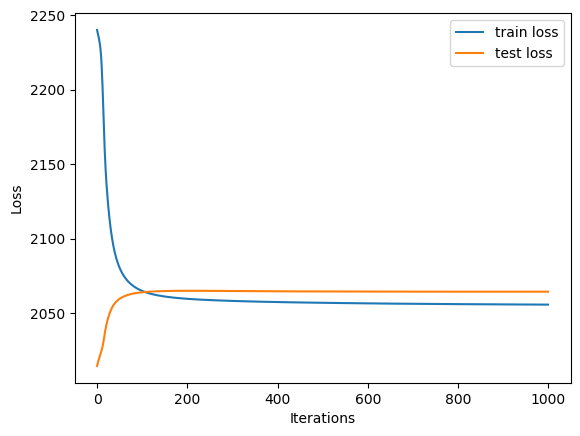

In [22]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [35]:
R_pred = W @ H

In [40]:
R_pred[R_pred>5]=5
R_pred[R_pred<1]=1

In [41]:
from sklearn.metrics import mean_squared_error

def get_rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()     
    actual = actual[actual.nonzero()].flatten() 
    return np.sqrt(mean_squared_error(pred, actual))

In [42]:
get_rmse(R_pred,R_test)

1.9569657844230057

In [44]:
float(R_pred.shape[0] * R_pred.shape[1])

2000000.0

In [43]:
np.count_nonzero(R_pred)

2000000

We can see that our R_pred is now filled with non zero entries. This means that we have predicted the ratings of all the movies, even if any user haven't watched one.

In [47]:
R_pred[3,4]
# [3,4] signifies the rating given by user with userId 4 to movie with movieId 5

2.3133572117381127